# Instructions
Excel spreadsheet name 'corpus'
Each row are a newspaper article.
The column 'Date' is the date YYYY-MM-DD
The column 'Titre' is the title of the article
The column 'Journal' is the name of the newspaper
The column 'Keywords" are keywords describing the content separated by ' | '
The column 'Location'  where each entry consists of country, region, or city names separated by ' | '
The column 'Contenu' is the full text of the article
The column 'Lemmatized_Contenu' in which the full text has been lemmatized and stop words have been removed
Note that all articles are written in French

# Temporal Analysis
Explore how the frequency of certain keywords varies over time.
Temporal analysis can reveal important trends and patterns in the corpus over time. Specifically, we can:
- Plot keyword frequency over time: This will show how certain themes or subjects have gained or lost prominence.
- Compare multiple keywords: To identify any correlational trends between different themes.
- Analyze seasonality: Check if certain keywords or themes have a periodic occurrence.

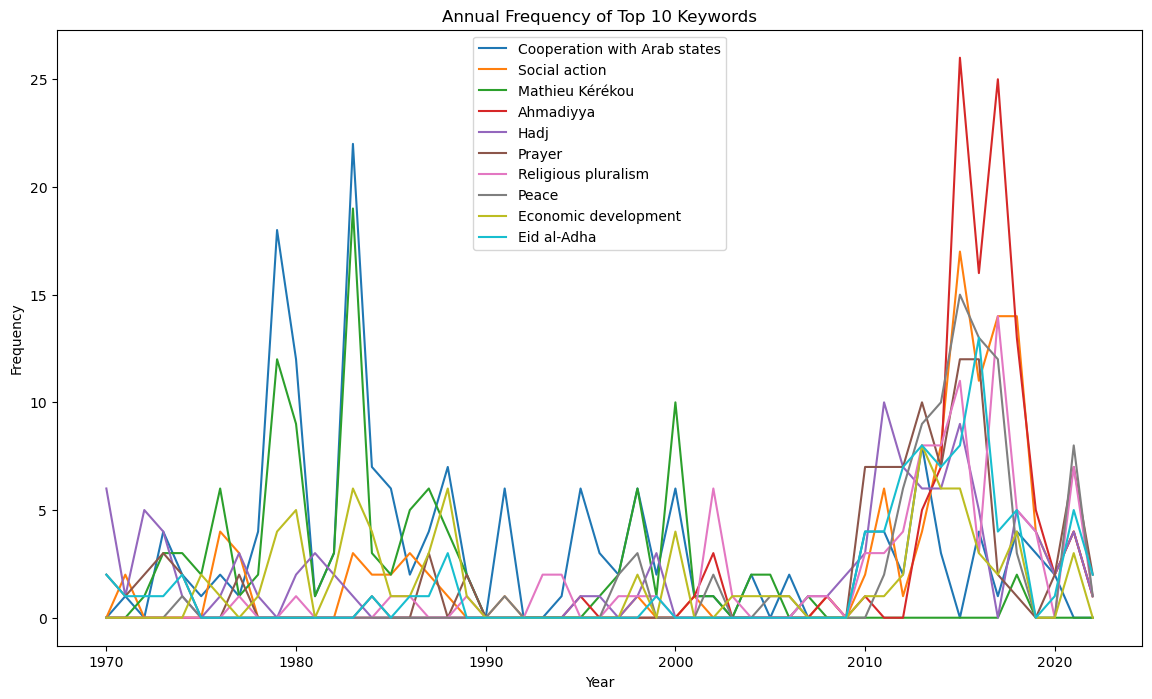

In [16]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel spreadsheet into a DataFrame
file_path = 'corpus.xlsx'
df = pd.read_excel(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Create a Counter object to hold the aggregated keywords
keyword_counter = Counter()

# Update the Counter object with keywords from each row
for keywords in df['Keywords'].dropna():
    keyword_list = keywords.split(' | ')
    keyword_counter.update(keyword_list)

# Get the most frequently occurring keywords (top 5 for demonstration)
most_common_keywords = [keyword for keyword, freq in keyword_counter.most_common(10)]

# Initialize a dictionary to hold the annual keyword frequencies
annual_keyword_freq = {keyword: [] for keyword in most_common_keywords}

# Loop through each year and count the occurrences of the most common keywords
for year, group in df.groupby('Year'):
    yearly_counter = Counter()
    for keywords in group['Keywords'].dropna():
        keyword_list = keywords.split(' | ')
        yearly_counter.update(keyword_list)
    for keyword in most_common_keywords:
        annual_keyword_freq[keyword].append(yearly_counter.get(keyword, 0))

# Create a DataFrame for the annual keyword frequencies
annual_keyword_df = pd.DataFrame(annual_keyword_freq, index=df['Year'].unique())
annual_keyword_df.sort_index(inplace=True)

# Plot the annual keyword frequencies
plt.figure(figsize=(14, 8))
for keyword in most_common_keywords:
    plt.plot(annual_keyword_df.index, annual_keyword_df[keyword], label=keyword)
plt.title('Annual Frequency of Top 10 Keywords')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The plot illustrates the annual frequency of the top 5 most common keywords in the corpus. This visualization allows us to observe several interesting trends:

Variability: Some keywords exhibit a more stable frequency over the years, while others show considerable fluctuations.

Dominance: Certain keywords consistently appear more frequently, suggesting their importance or prominence in the dataset.

Temporal Shifts: There may be years where specific keywords spike or dip, which could be indicative of broader socio-political or cultural changes.

For a more nuanced understanding, this analysis can be complemented with qualitative assessments or further quantitative measures.

## Compare multiple keywords
Certainly, to compare multiple keywords over time, we can modify the existing code to allow for the selection of specific keywords of interest. Here's the Python code that enables you to compare the annual frequencies of multiple specified keywords:

In this code, replace the list keywords_to_compare with the specific keywords you wish to analyze. The plot will then show the annual frequencies of these selected keywords, allowing for a comparative analysis.

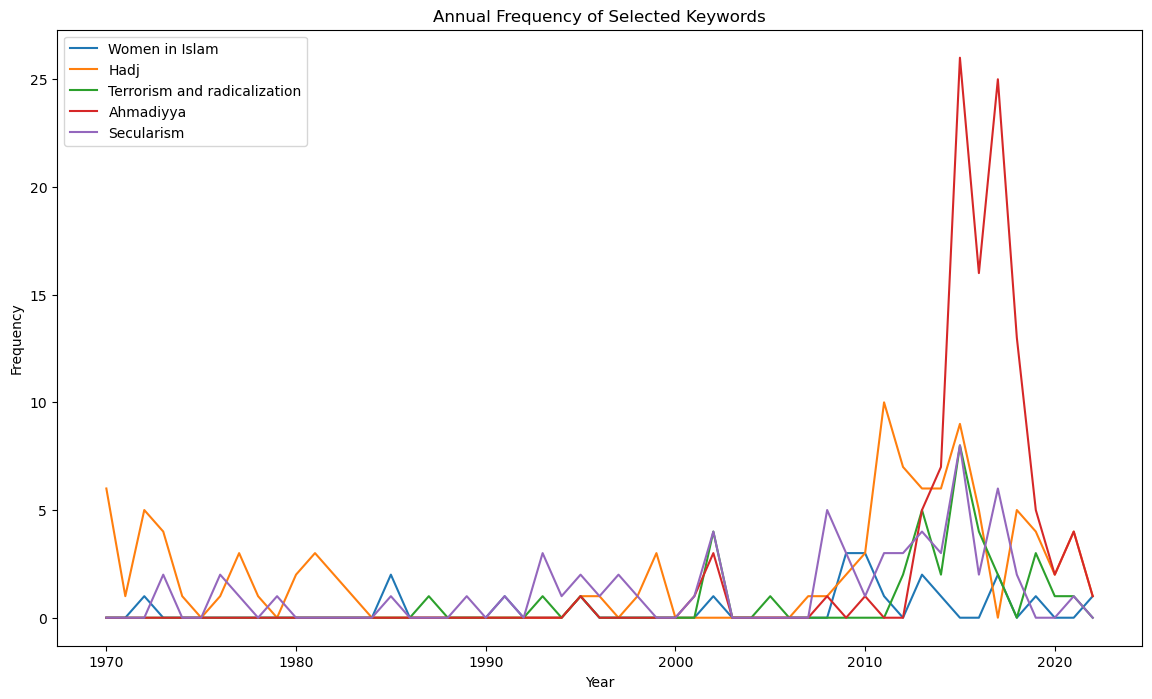

In [50]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel spreadsheet into a DataFrame
file_path = 'corpus.xlsx'
df = pd.read_excel(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Keywords to compare (replace these with the keywords you're interested in)
keywords_to_compare = ['Women in Islam', 'Hadj', 'Terrorism and radicalization', 'Ahmadiyya', 'Secularism']

# Initialize a dictionary to hold the annual keyword frequencies
annual_keyword_freq = {keyword: [] for keyword in keywords_to_compare}

# Loop through each year and count the occurrences of the specified keywords
for year, group in df.groupby('Year'):
    yearly_counter = Counter()
    for keywords in group['Keywords'].dropna():
        keyword_list = keywords.split(' | ')
        yearly_counter.update(keyword_list)
    for keyword in keywords_to_compare:
        annual_keyword_freq[keyword].append(yearly_counter.get(keyword, 0))

# Create a DataFrame for the annual keyword frequencies
annual_keyword_df = pd.DataFrame(annual_keyword_freq, index=df['Year'].unique())
annual_keyword_df.sort_index(inplace=True)

# Plot the annual keyword frequencies
plt.figure(figsize=(14, 8))
for keyword in keywords_to_compare:
    plt.plot(annual_keyword_df.index, annual_keyword_df[keyword], label=keyword)
plt.title('Annual Frequency of Selected Keywords')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Network Analysis
Network analysis can be an excellent way to visualize and understand the relationships between various keywords in your corpus. In this context, each keyword can be considered as a node in the network, and the connections (or edges) between them can be determined based on their co-occurrence in the same articles.

Here's how we can proceed:

Data Preparation: Generate a co-occurrence matrix for the keywords.
Network Construction: Use the co-occurrence matrix to build a network graph.
Visualization: Plot the network graph to visualize relationships.
Analysis: Compute network metrics to understand the centrality and importance of individual keywords.

In [18]:
from itertools import combinations
import pandas as pd

# Load your DataFrame (assuming it's already loaded as df)

# Initialize an empty dictionary to hold the co-occurrence counts
co_occurrence_dict = {}

# Populate the co-occurrence dictionary based on the 'Keywords' column
for keywords in df['Keywords'].dropna():
    keyword_list = keywords.split(' | ')
    # Create all unique combinations of keywords in the current article
    for keyword_pair in combinations(keyword_list, 2):
        keyword_pair = tuple(sorted(keyword_pair))  # Sort to ensure ("A", "B") is the same as ("B", "A")
        co_occurrence_dict[keyword_pair] = co_occurrence_dict.get(keyword_pair, 0) + 1

# Convert the co-occurrence dictionary to a DataFrame
co_occurrence_df = pd.DataFrame(list(co_occurrence_dict.items()), columns=['Keyword_Pair', 'Co-occurrence'])
co_occurrence_df.sort_values('Co-occurrence', ascending=False, inplace=True)

# Display the top co-occurring keyword pairs
print(co_occurrence_df.head())


                                           Keyword_Pair  Co-occurrence
5278                     (Ahmadiyya, Rana Farooq Ahmad)             74
3164                         (Ahmadiyya, Social action)             71
503     (Cooperation with Arab states, Mathieu Kérékou)             69
761   (Cooperation with Arab states, Economic develo...             53
5373                 (Rana Farooq Ahmad, Social action)             51


Once you have your co-occurrence matrix, the next steps involve constructing the network graph and then visualizing it. We'll use the networkx library for these tasks. In this code:

G = nx.Graph() initializes a new empty graph.
The for loop iterates over your co-occurrence DataFrame, adding an edge between each pair of co-occurring keywords. The weight of each edge corresponds to the number of co-occurrences.
We optionally remove nodes with low degree (less connected nodes) for better visualization, but you can adjust this as needed.
Finally, we visualize the graph using Matplotlib.
Remember to run this code after generating the co-occurrence matrix using the previous Python snippet. You can adjust the parameters like node size, font size, and the threshold for low-degree nodes as per your needs.

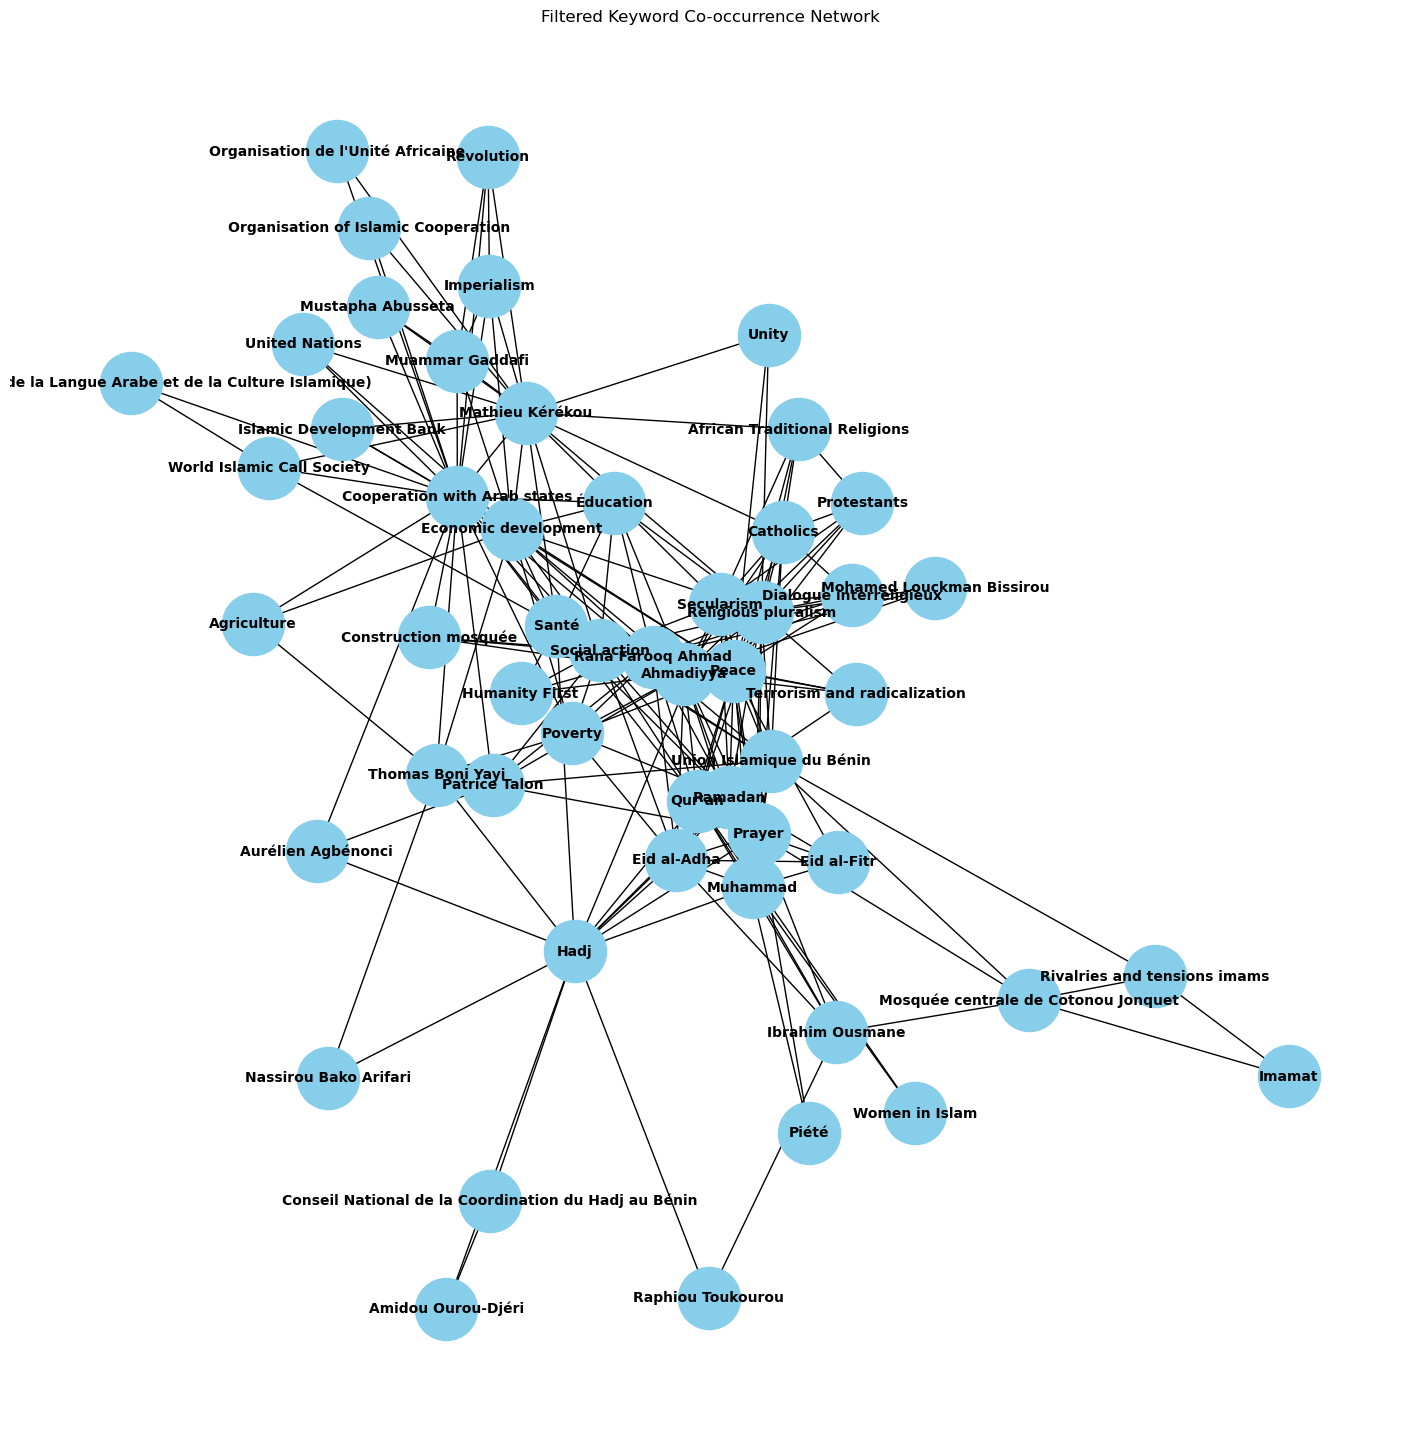

In [19]:
# Create a new graph from the co-occurrence matrix with thresholding
G_filtered = nx.Graph()

# Add edges to the graph if the co-occurrence count is above a threshold (e.g., 5)
threshold = 5
for index, row in co_occurrence_df.iterrows():
    keyword1, keyword2 = row['Keyword_Pair']
    weight = row['Co-occurrence']
    if weight > threshold:
        G_filtered.add_edge(keyword1, keyword2, weight=weight)

# Remove nodes with low degree (e.g., degree < 2)
low_degree_nodes = [node for node, degree in dict(G_filtered.degree()).items() if degree < 2]
G_filtered.remove_nodes_from(low_degree_nodes)

# Draw the filtered graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_filtered, seed=42)  # positions for all nodes
nx.draw(G_filtered, pos, with_labels=True, font_weight='bold', node_color="skyblue", node_size=2000, font_size=10)
plt.title('Filtered Keyword Co-occurrence Network')
plt.show()


If you're interested in exporting the network information for further analysis or visualization in other software (like Gephi or Cytoscape), you can save the edge list and node attributes to CSV files. The edge list will contain pairs of nodes that have a relationship, and you can include the weight of each relationship as well.
Here's how you can export the edge list and node attributes:

In [9]:
# Export the edge list to a CSV file
edge_list_df = pd.DataFrame(list(G_filtered.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
edge_list_df['Weight'] = edge_list_df['Attributes'].apply(lambda x: x['weight'])
edge_list_df.drop('Attributes', axis=1, inplace=True)
edge_list_df.to_csv('edge_list.csv', index=False)


In [10]:
# Export node attributes to a CSV file
node_attributes_df = pd.DataFrame(list(G_filtered.nodes(data=True)), columns=['Node', 'Attributes'])
node_attributes_df['Degree'] = node_attributes_df['Node'].apply(lambda x: G_filtered.degree(x))
node_attributes_df.drop('Attributes', axis=1, inplace=True)
node_attributes_df.to_csv('node_attributes.csv', index=False)


The edge_list.csv will contain the pairs of keywords that have relationships, along with the weight (i.e., co-occurrence count) of each relationship.
The node_attributes.csv will contain each node and its degree (number of connections).

# Statistical Testing
Statistical testing to compare differences between newspapers can provide valuable insights into the distribution and focus of topics or keywords. This type of analysis can help identify potential biases, foci, or gaps in the media landscape.

Here are some steps to conduct this analysis:
Data Aggregation: Group the articles by newspaper and aggregate the keywords.
Frequency Analysis: Compute the frequency of each keyword for each newspaper.
Statistical Testing: Apply tests like Chi-Square or Fisher’s Exact Test to determine if the differences in keyword frequencies are statistically significant.
Let's start with data aggregation and frequency analysis. Would you like Python code to perform these initial steps?

In [20]:
from collections import Counter
import pandas as pd

# Initialize a dictionary to hold keyword frequencies for each newspaper
newspaper_keyword_freq = {}

# Loop through each newspaper and count the occurrences of each keyword
for newspaper, group in df.groupby('Journal'):
    newspaper_counter = Counter()
    for keywords in group['Keywords'].dropna():
        keyword_list = keywords.split(' | ')
        newspaper_counter.update(keyword_list)
    newspaper_keyword_freq[newspaper] = newspaper_counter

# Convert the nested dictionary to a DataFrame for easier analysis
newspaper_keyword_df = pd.DataFrame.from_dict(newspaper_keyword_freq, orient='index').fillna(0).transpose()

# Display the DataFrame (or save it for your records)
print(newspaper_keyword_df.head())


                           Daho-Express  Ehuzu  La Nation
Alexandre Taofick Paraïso           1.0    0.0        0.0
Dr Saroukou Raouf                   1.0    0.0        0.0
Mouazinou Ladami                    1.0    0.0        0.0
Hadj                               17.0   13.0       72.0
Eid al-Adha                         7.0    6.0       69.0


One common method for comparing the frequency of keywords across different categories (in this case, newspapers) is the Chi-Square Test of Independence. This test will help us determine if the occurrence of keywords is independent of the newspaper source.

Here's a Python code snippet that uses the scipy.stats library to perform the Chi-Square Test:

In [21]:
from scipy.stats import chi2_contingency

# Select a subset of keywords for the test (e.g., the 5 most common keywords across all newspapers)
selected_keywords = newspaper_keyword_df.sum(axis=1).nlargest(5).index.tolist()

# Create a contingency table for the selected keywords
contingency_table = newspaper_keyword_df.loc[selected_keywords]

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result
alpha = 0.05  # Significance level
if p < alpha:
    print("The differences in keyword frequencies between the newspapers are statistically significant.")
else:
    print("The differences in keyword frequencies between the newspapers are not statistically significant.")


Chi-Square Statistic: 221.74553026235344
P-Value: 1.6470109504664016e-43
Degrees of Freedom: 8
The differences in keyword frequencies between the newspapers are statistically significant.


In this code snippet:
selected_keywords are the keywords you want to test. Here, I've chosen the top 5 most frequent keywords across all newspapers, but you can select them based on your research questions.
chi2_contingency() performs the Chi-Square Test and returns the Chi-Square statistic, p-value, degrees of freedom, and expected frequencies.
The p-value is then compared to a significance level (alpha) to interpret the result.

The Chi-Square statistic and the extremely low p-value suggest that the differences in keyword frequencies across newspapers are statistically significant at the 0.05 level. With 8 degrees of freedom, the result provides strong evidence that keyword usage is not independent of the newspaper source.

In academic terms, this result opens up several avenues for deeper inquiry:

Thematic Focus: Each newspaper may have a distinct thematic focus that guides its keyword usage.
Editorial Policy: Differences could be reflective of the newspapers' editorial policies or orientations.
Audience: Different target audiences could also explain variations in keyword frequencies.
Given the statistical significance, it would be pertinent to delve into why these differences exist. Qualitative methods like content analysis or interviews with editorial teams could complement these findings. You could also extend the statistical analysis to see if the patterns hold for different subgroups of data or over different periods.

## Different sample sizes
The Chi-Square Test of Independence does take into account the different sample sizes (i.e., the number of articles from each newspaper) through its expected frequencies. However, the test assumes that the samples are large enough for the approximations to be valid. If one newspaper has a substantially larger number of articles than another, the test could be sensitive to this imbalance.

In cases where the dataset is imbalanced, it's often beneficial to normalize the frequencies or to use proportions rather than raw counts. Normalizing helps to mitigate the impact of one group's larger sample size on the statistical test.

To conduct a normalized analysis, you could calculate the proportion of each keyword's occurrence relative to the total number of keyword occurrences in each newspaper. Here's how you could adjust the contingency table in Python:

By normalizing, you account for the difference in the number of articles from each newspaper, making the test more robust to sample size imbalance.

In [22]:
# Normalize the counts to get proportions
normalized_contingency_table = contingency_table / contingency_table.sum() * contingency_table.sum(axis=1).values.reshape(-1, 1)

# Perform the Chi-Square Test on the normalized table
chi2_norm, p_norm, dof_norm, expected_norm = chi2_contingency(normalized_contingency_table)

# Display and interpret the results as before
print(f"Chi-Square Statistic: {chi2_norm}")
print(f"P-Value: {p_norm}")
print(f"Degrees of Freedom: {dof_norm}")

alpha = 0.05  # Significance level
if p_norm < alpha:
    print("The differences in keyword frequencies between the newspapers are statistically significant.")
else:
    print("The differences in keyword frequencies between the newspapers are not statistically significant.")


Chi-Square Statistic: 170.22833938358553
P-Value: 1.1551420513404967e-32
Degrees of Freedom: 8
The differences in keyword frequencies between the newspapers are statistically significant.


# Topic Modeling
Use algorithms like Latent Dirichlet Allocation (LDA) to uncover the underlying topics in your corpus. This could reveal the main themes covered by different newspapers or over time.

Topic Modeling is an excellent choice for a corpus of newspaper articles. It allows you to identify the latent topics that pervade your dataset. Latent Dirichlet Allocation (LDA) is one of the most commonly used methods for this. Topic modeling can provide a structured way to understand the thematic underpinnings of your corpus, which could be particularly useful for chapters or sections that analyze content trends.

Here's a general outline of how to perform LDA Topic Modeling using Python's gensim library:

Data Preprocessing: Tokenize the text and remove stop words.
Feature Engineering: Create a dictionary and a term-document frequency matrix.
Model Training: Train the LDA model.
Topic Examination: Examine the topics generated by the model.
Visualization: Optionally, visualize the topics for better understanding.
Here's a Python code snippet to give you a basic idea:

In [51]:
from gensim import corpora, models
from nltk.corpus import stopwords
import string

# Data preprocessing
stop_words = set(stopwords.words('french'))  # Using French stopwords
stop_words.update(["avoir", "être", ",", ".", ")", "("])  # Adding custom stopwords
texts = df['Lemmatized_Contenu'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])

# Feature Engineering
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Filter extremes
corpus = [dictionary.doc2bow(text) for text in texts]

# Model Training
lda_model = models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=15)

# Topic Examination
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(f'Topic {topic[0]}: Words: {topic[1]}')


Topic 0: Words: 0.013*"islamique" + 0.012*"ahmadiyya" + 0.011*"paix" + 0.010*"communauté"
Topic 1: Words: 0.010*"état" + 0.009*"libyen" + 0.007*"religieux" + 0.007*"populaire"
Topic 2: Words: 0.008*"pouvoir" + 0.005*"devoir" + 0.005*"islamique" + 0.005*":"
Topic 3: Words: 0.011*"ministre" + 0.009*"état" + 0.007*"hadj" + 0.006*"deux"
Topic 4: Words: 0.015*"prière" + 0.012*"fidèle" + 0.012*"fête" + 0.012*"imam"


In this example, num_topics=5 specifies that we want the model to identify 5 topics.
The parameter passes=15 specifies the number of passes through the corpus during training. You can adjust these according to your needs.

After running this code, you should see the top words for each topic, which will give you an idea of what each topic is about. You could then label these topics based on your understanding and proceed with a more in-depth analysis, possibly relating the topics back to the variables you've studied (e.g., time, newspaper source).

## Bar Charts for Top Words in Each Topic
You can create simple bar charts to display the top words for each topic. This won't give you the inter-topic relationship insights that pyLDAvis provides, but it will offer a readable view of the words that characterize each topic.

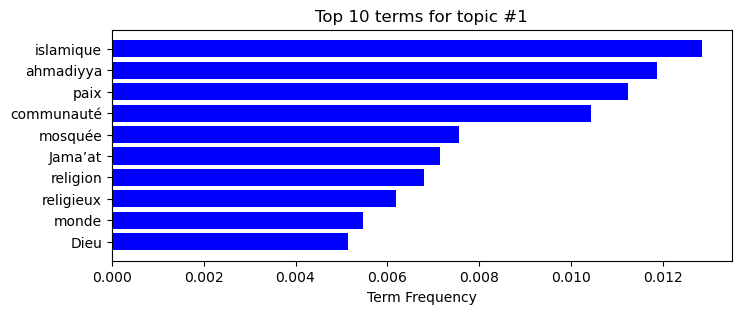

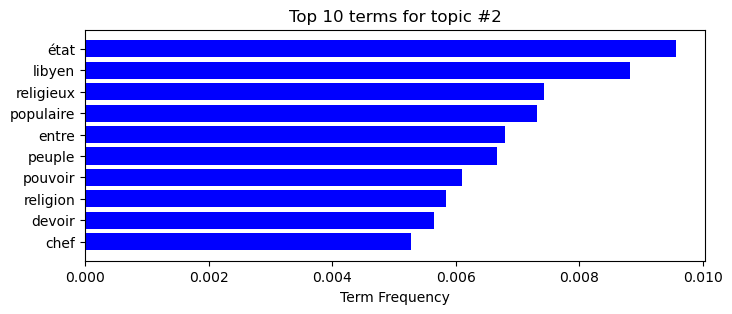

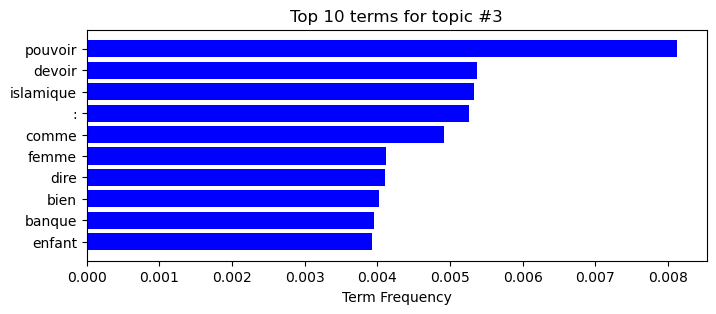

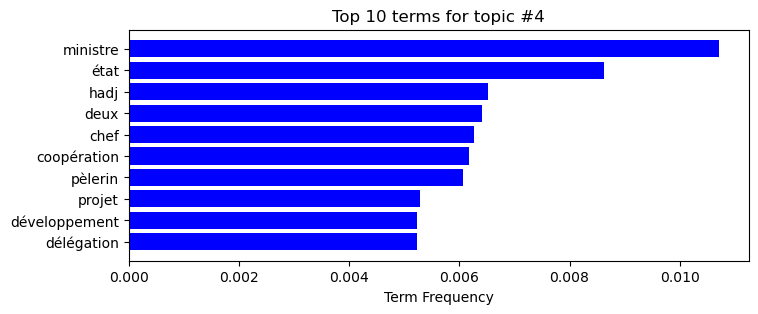

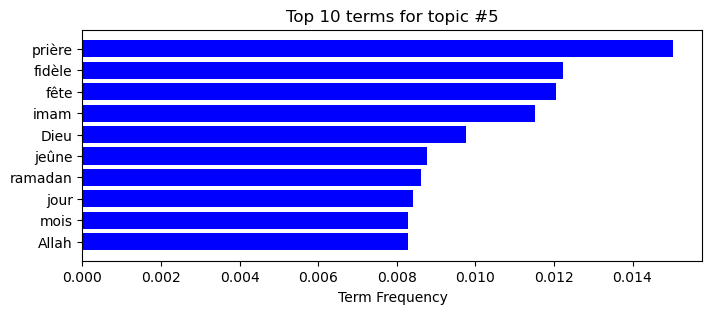

In [52]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, num_topics, num_words=10):
    for i in range(num_topics):
        terms = [term for term, freq in lda_model.show_topic(i, topn=num_words)]
        term_weights = [freq for term, freq in lda_model.show_topic(i, topn=num_words)]
        
        plt.figure(figsize=(8, 3))
        plt.barh(range(num_words), term_weights, align='center', color='blue')
        plt.yticks(range(num_words), terms)
        plt.gca().invert_yaxis()
        plt.title(f"Top {num_words} terms for topic #{i+1}")
        plt.xlabel("Term Frequency")
        plt.show()

plot_top_words(lda_model, num_topics=5)


## Word Clouds
Word clouds provide a visually pleasing way to display the terms in each topic. The size of each term in the word cloud can be set to its frequency or importance score within the topic.

In [29]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [31]:
pip install --upgrade wordcloud Pillow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.6/2.6 MB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Ima

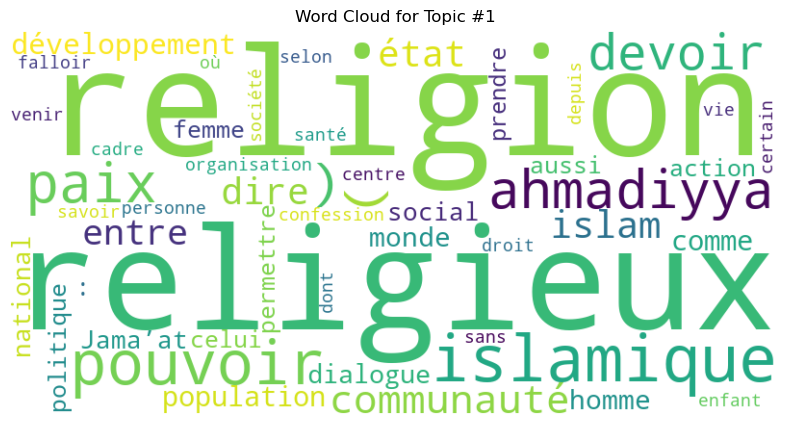

C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow

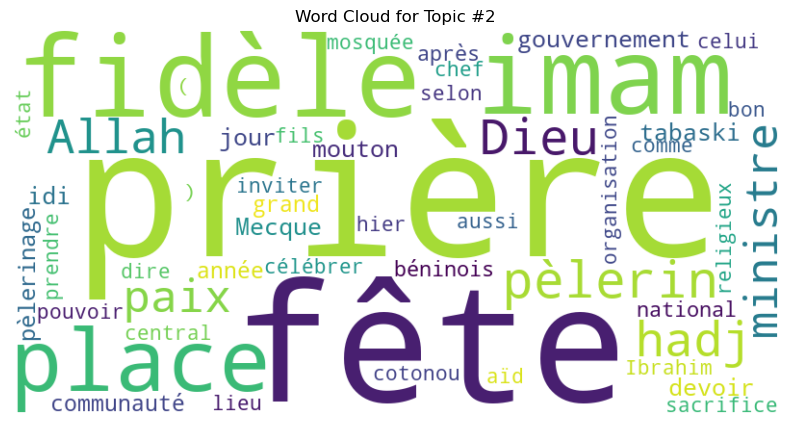

C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Ima

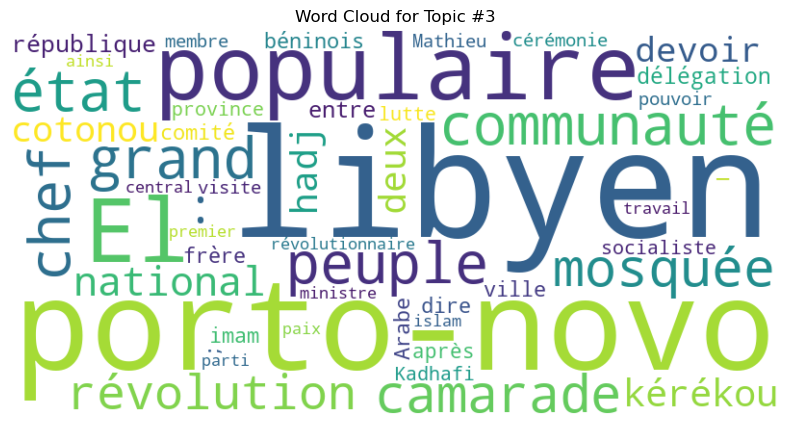

C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Ima

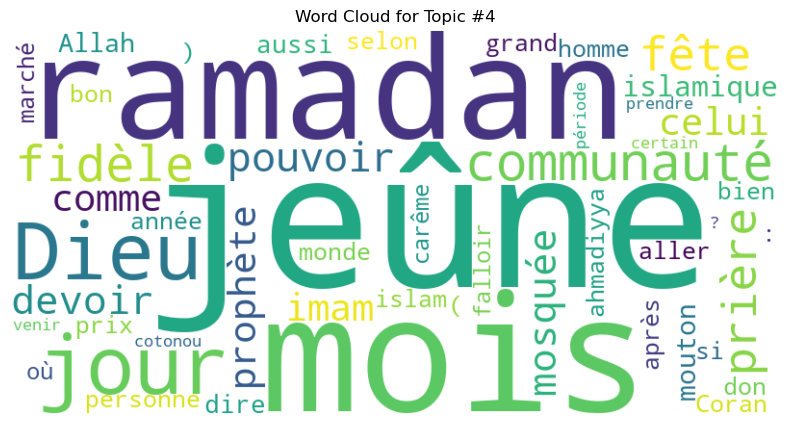

C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Frédérick\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow

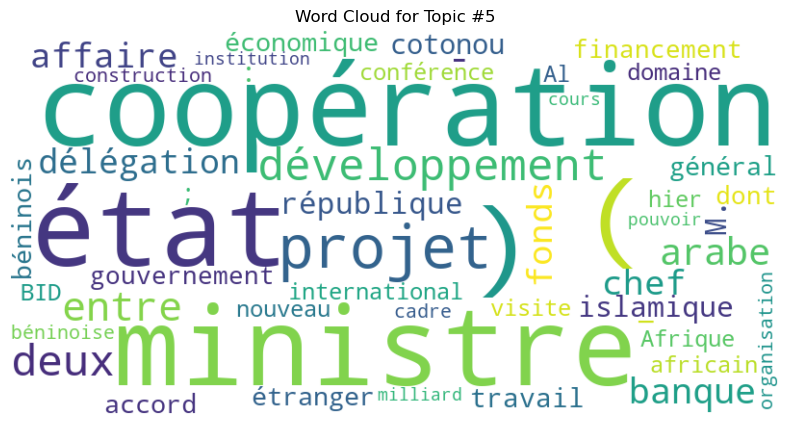

In [32]:
from wordcloud import WordCloud

def plot_wordcloud(lda_model, num_topics, num_words=50):
    for i in range(num_topics):
        terms = {term: freq for term, freq in lda_model.show_topic(i, topn=num_words)}
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(terms)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Topic #{i+1}")
        plt.show()

plot_wordcloud(lda_model, num_topics=5)


# Sentiment Analysis
Analyze the sentiment or tone of articles to understand how different subjects are portrayed. This can be particularly insightful when comparing newspapers or looking at coverage of specific events.
Sentiment Analysis can provide valuable insights into the tone and emotional context of your corpus. This could be particularly useful to examine how these groups are portrayed in various newspapers over time. Sentiment analysis could be applied on a per-article basis to give each article a sentiment score, which can then be aggregated or examined in various ways.

Here's a general outline of the process using Python's TextBlob library:

Install TextBlob: If you haven't installed TextBlob yet, you can do so with pip install textblob.
Import Library: Import TextBlob and other necessary libraries.
Text Preprocessing: Prepare the text data.
Sentiment Scoring: Score each article using TextBlob's sentiment analysis feature.
Aggregation and Analysis: Analyze the sentiment scores in various ways.

In [33]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 636.8/636.8 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
from textblob import TextBlob
import pandas as pd

# Assuming df is your DataFrame and 'Contenu' is the column with text
df['Contenu'] = df['Contenu'].astype(str)

# Sentiment Scoring
df['Polarity'] = df['Contenu'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Contenu'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Now you have two new columns: 'Polarity' and 'Subjectivity' which contain the sentiment scores


After this, you can:

## Examine Mean Sentiment by Newspaper
Analyzing the mean sentiment by newspaper can offer key insights into the general tone each newspaper adopts when discussing the subjects of interest in your research. This is particularly relevant if you're interested in exploring potential biases or differences in representation across various media outlets.

In this visualization:

Polarity: Values range from -1 to 1, where -1 indicates extremely negative sentiment, 1 indicates extremely positive sentiment, and 0 indicates neutral sentiment.
Subjectivity: Values range from 0 to 1, where 0 is very objective and 1 is very subjective. You can also plot this if you find it relevant.
This visual representation can be a powerful way to compare how different newspapers approach the topics in your corpus, potentially revealing systematic biases or perspectives.

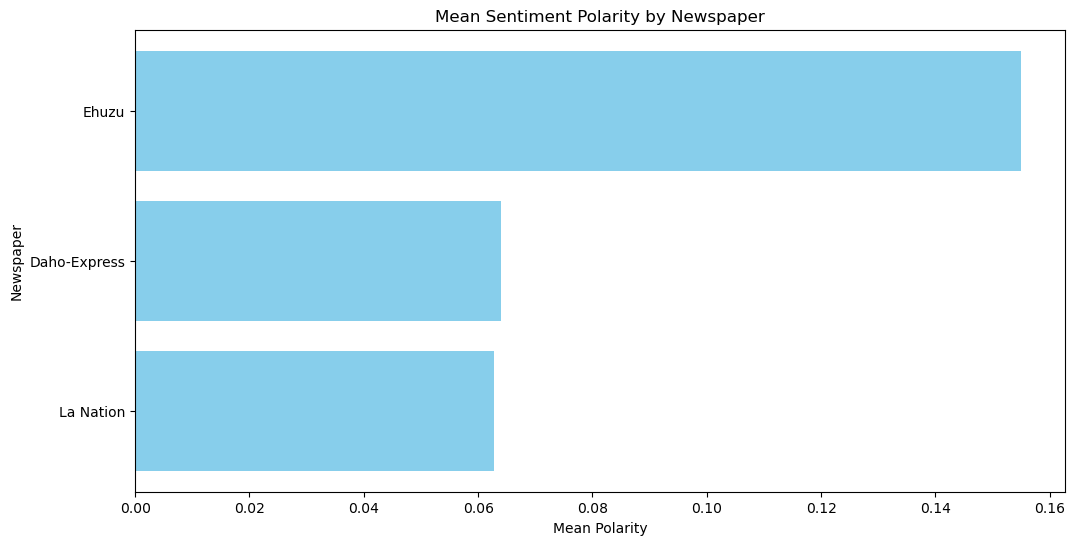

In [35]:
import matplotlib.pyplot as plt

# Group the data by newspaper and calculate the mean sentiment
mean_sentiment_by_newspaper = df.groupby('Journal').agg({'Polarity': 'mean', 'Subjectivity': 'mean'}).reset_index()

# Sort the DataFrame by polarity for better visualization
mean_sentiment_by_newspaper = mean_sentiment_by_newspaper.sort_values(by='Polarity', ascending=False)

# Create the bar plot for mean polarity by newspaper
plt.figure(figsize=(12, 6))
plt.barh(mean_sentiment_by_newspaper['Journal'], mean_sentiment_by_newspaper['Polarity'], color='skyblue')
plt.xlabel('Mean Polarity')
plt.ylabel('Newspaper')
plt.title('Mean Sentiment Polarity by Newspaper')
plt.gca().invert_yaxis()
plt.show()


## Temporal Trends
Plot sentiment over time to examine temporal trends.
Examining temporal trends in sentiment can provide valuable insights into how the public discourse around your topics of interest has evolved over time. For instance, you may find that sentiment around certain religious or student associations becomes more positive or negative in response to specific events or broader social changes.

Here's how you can plot the temporal trends of sentiment:

Convert Date to DateTime: Ensure the 'Date' column in your DataFrame is in DateTime format.
Group by Date: Aggregate the sentiment scores by date.
Plot the Trends: Use line plots to visualize the aggregated sentiment scores over time.

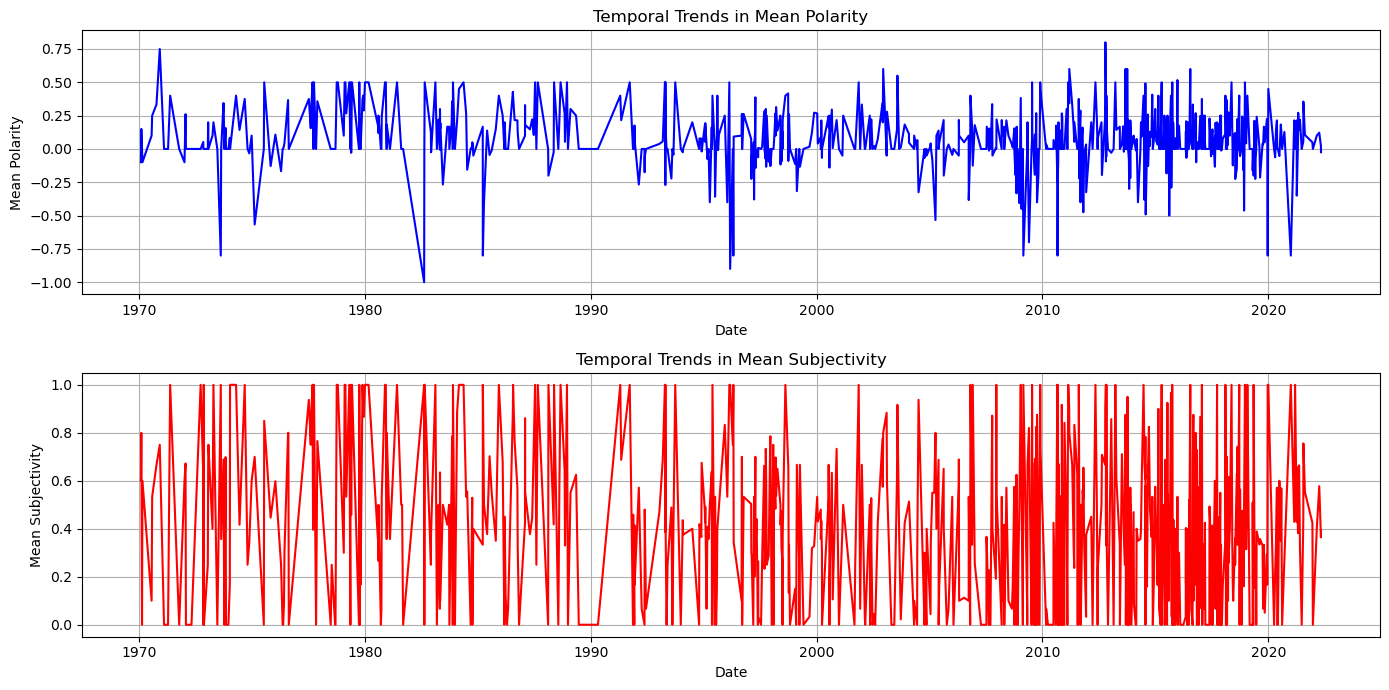

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Date' is the column containing the dates and it's already in DateTime format
# If not, convert it to DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Group data by Date and calculate the mean sentiment
mean_sentiment_by_date = df.groupby('Date').agg({'Polarity': 'mean', 'Subjectivity': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Plot for mean polarity
plt.subplot(2, 1, 1)
plt.plot(mean_sentiment_by_date['Date'], mean_sentiment_by_date['Polarity'], label='Mean Polarity', color='b')
plt.xlabel('Date')
plt.ylabel('Mean Polarity')
plt.title('Temporal Trends in Mean Polarity')
plt.grid(True)

# Plot for mean subjectivity
plt.subplot(2, 1, 2)
plt.plot(mean_sentiment_by_date['Date'], mean_sentiment_by_date['Subjectivity'], label='Mean Subjectivity', color='r')
plt.xlabel('Date')
plt.ylabel('Mean Subjectivity')
plt.title('Temporal Trends in Mean Subjectivity')
plt.grid(True)

plt.tight_layout()
plt.show()


In these plots:

Mean Polarity: Measures the general positivity or negativity of articles published on each date.
Mean Subjectivity: Measures the subjectivity or objectivity of articles published on each date.
By examining these plots, you can identify significant fluctuations in sentiment, which can then be further analyzed to understand their context or cause.

## Topic-Related Sentiment
Examine sentiment scores for articles related to specific keywords or topics.

Analyzing topic-related sentiment allows you to focus on the nuances in how specific subjects are discussed across your corpus. This can be particularly insightful for your research, as you may discover varying levels of sentiment associated with different religious or student groups, for instance.

Here's how you can perform a topic-related sentiment analysis:

Keyword Filtering: Filter articles that contain specific keywords related to the topics you're interested in.
Group and Aggregate: Group the filtered articles by the keyword and calculate the mean sentiment.
Visualize: Plot the aggregated mean sentiment for each keyword.
Here's a Python code snippet to guide you through these steps:

After running this code, you'll get a bar plot that shows the mean sentiment polarity for each keyword. This will give you an idea of how positively or negatively each topic is discussed in your corpus.

C:\Users\Frédérick\AppData\Local\Temp\ipykernel_27436\2221801453.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_sentiment_df = topic_sentiment_df.append({
C:\Users\Frédérick\AppData\Local\Temp\ipykernel_27436\2221801453.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_sentiment_df = topic_sentiment_df.append({
C:\Users\Frédérick\AppData\Local\Temp\ipykernel_27436\2221801453.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_sentiment_df = topic_sentiment_df.append({
C:\Users\Frédérick\AppData\Local\Temp\ipykernel_27436\2221801453.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_sentiment_df = topi

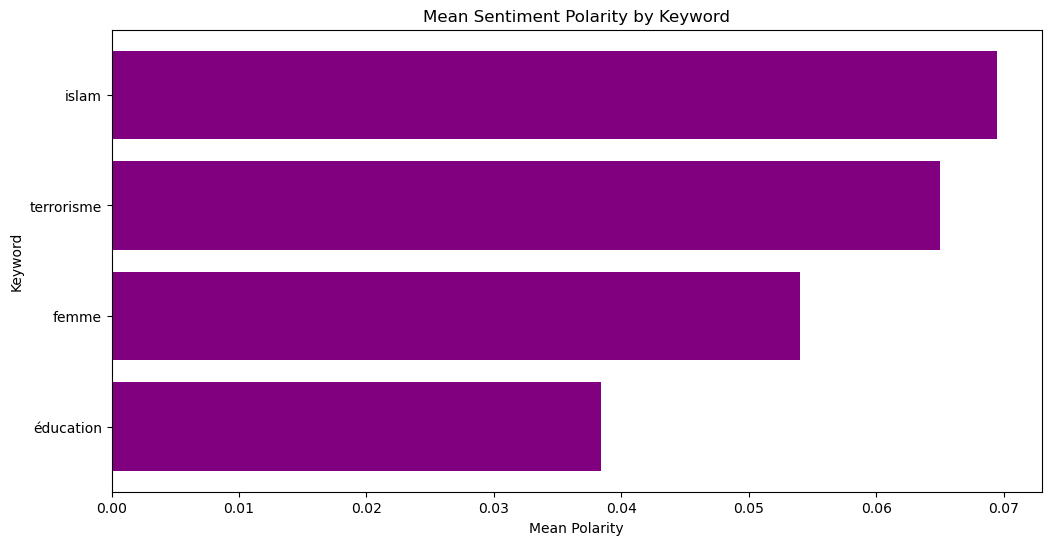

In [37]:
import matplotlib.pyplot as plt

# List of keywords related to topics of interest
keywords = ['femme', 'islam', 'terrorisme', 'éducation']

# Initialize an empty DataFrame to store the results
topic_sentiment_df = pd.DataFrame(columns=['Keyword', 'Mean_Polarity', 'Mean_Subjectivity'])

# Loop through each keyword to filter articles and calculate mean sentiment
for keyword in keywords:
    filtered_df = df[df['Contenu'].str.contains(keyword, case=False)]
    mean_polarity = filtered_df['Polarity'].mean()
    mean_subjectivity = filtered_df['Subjectivity'].mean()
    topic_sentiment_df = topic_sentiment_df.append({
        'Keyword': keyword,
        'Mean_Polarity': mean_polarity,
        'Mean_Subjectivity': mean_subjectivity
    }, ignore_index=True)

# Sort by Mean_Polarity for better visualization
topic_sentiment_df = topic_sentiment_df.sort_values(by='Mean_Polarity', ascending=False)

# Create bar plot for Mean Polarity by Keyword
plt.figure(figsize=(12, 6))
plt.barh(topic_sentiment_df['Keyword'], topic_sentiment_df['Mean_Polarity'], color='purple')
plt.xlabel('Mean Polarity')
plt.ylabel('Keyword')
plt.title('Mean Sentiment Polarity by Keyword')
plt.gca().invert_yaxis()
plt.show()


### Sentiment Over Time for Each Topic

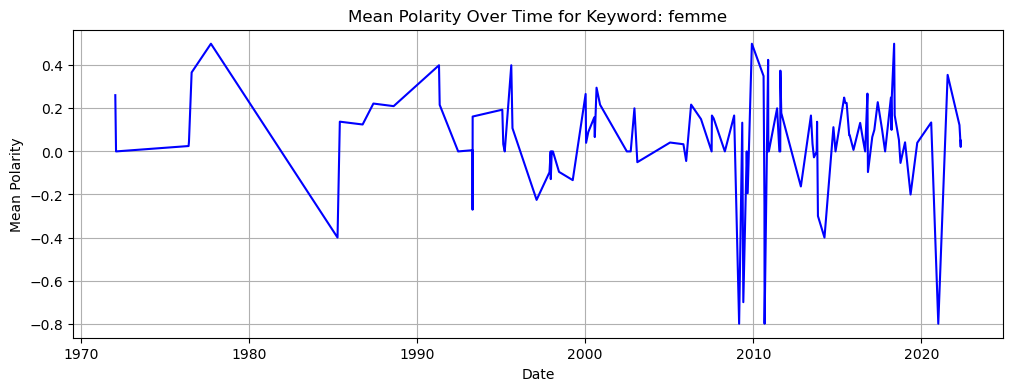

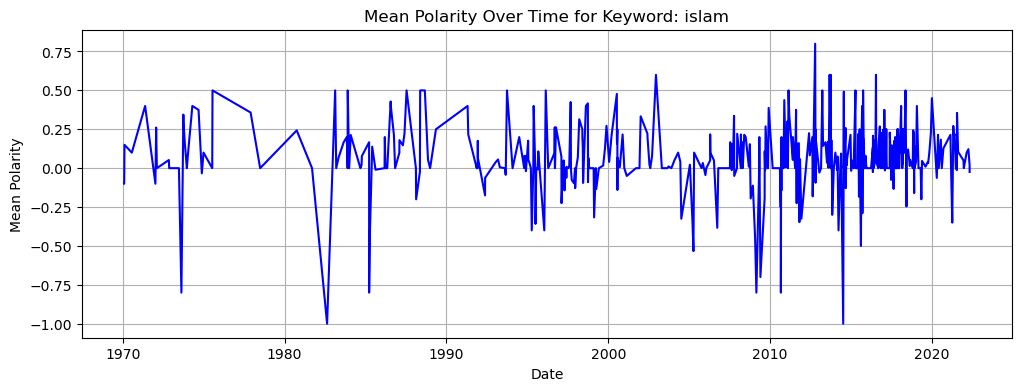

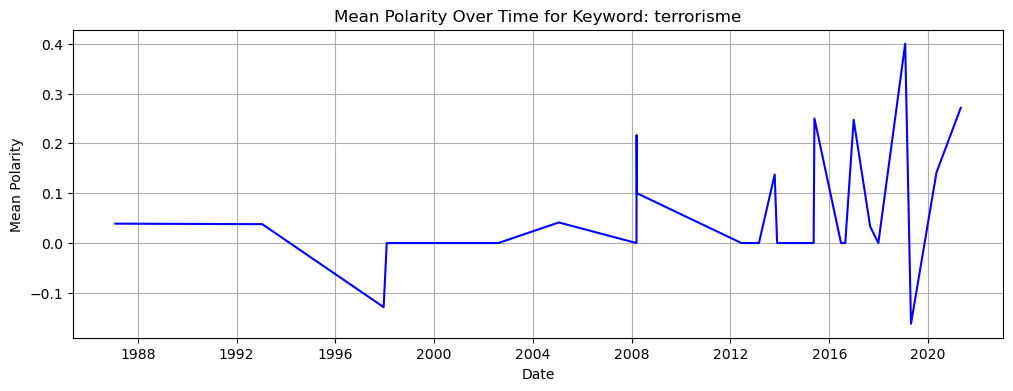

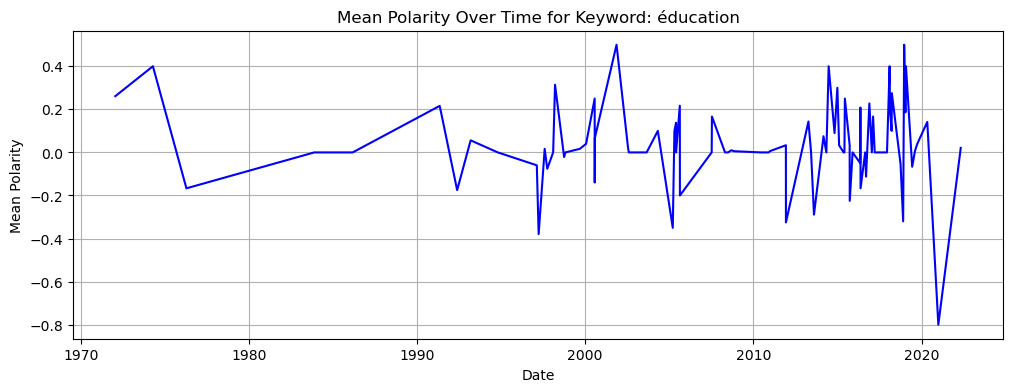

In [38]:
for keyword in keywords:
    keyword_df = df[df['Contenu'].str.contains(keyword, case=False)]
    keyword_df_by_date = keyword_df.groupby('Date').agg({'Polarity': 'mean'}).reset_index()
    
    plt.figure(figsize=(12, 4))
    plt.plot(keyword_df_by_date['Date'], keyword_df_by_date['Polarity'], label='Mean Polarity', color='b')
    plt.title(f'Mean Polarity Over Time for Keyword: {keyword}')
    plt.xlabel('Date')
    plt.ylabel('Mean Polarity')
    plt.grid(True)
    plt.show()


### Newspaper-Specific Topic Sentiment

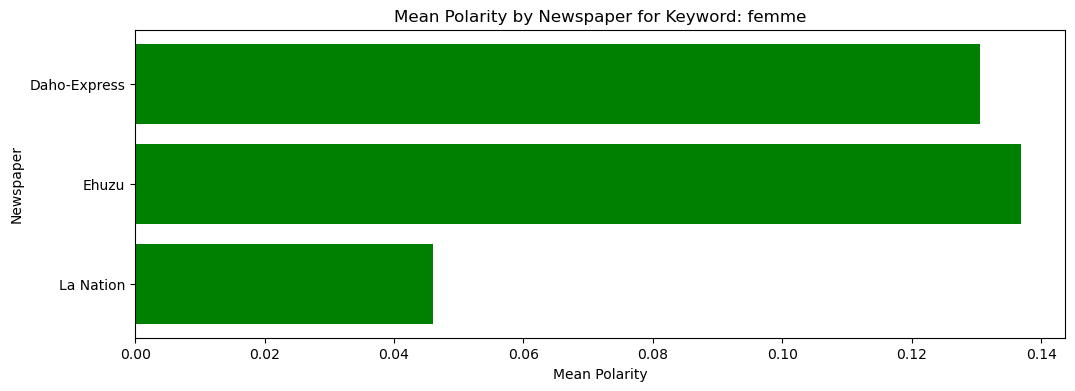

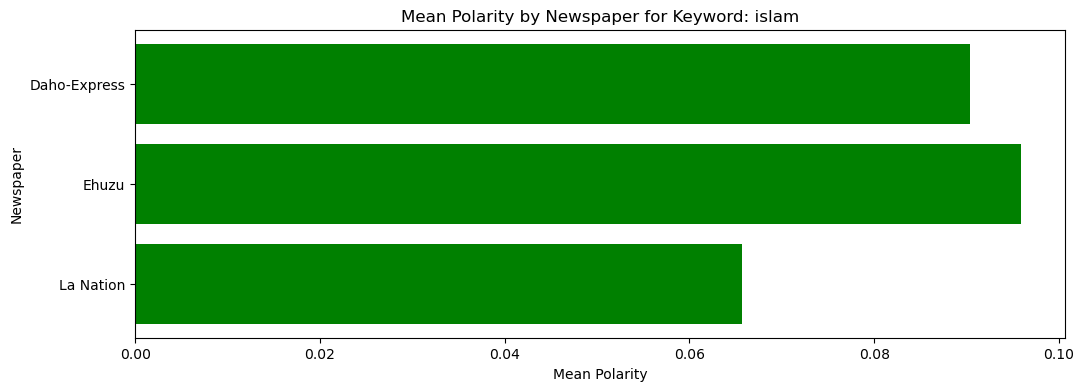

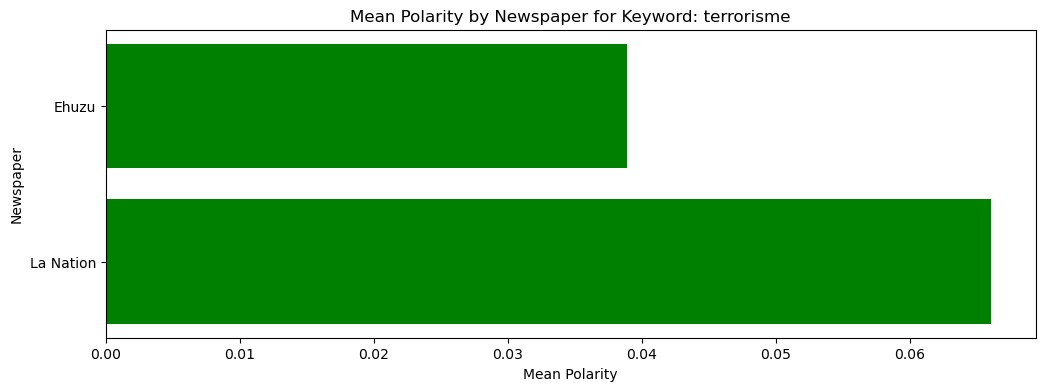

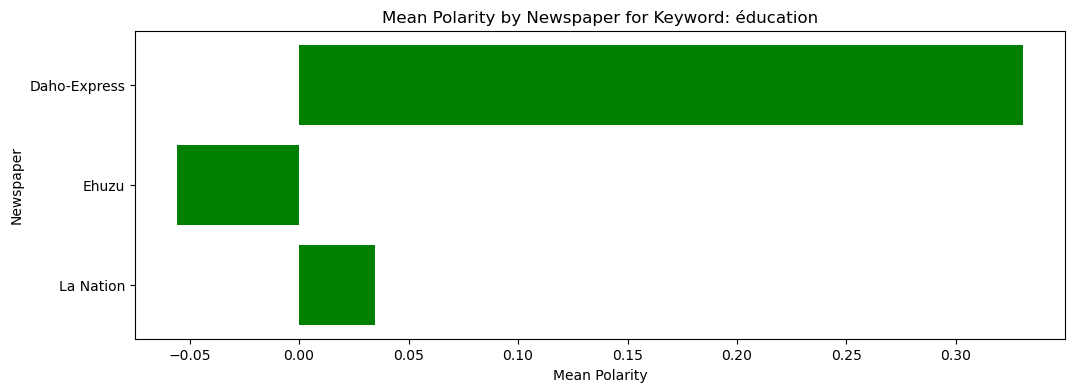

In [39]:
for keyword in keywords:
    keyword_df = df[df['Contenu'].str.contains(keyword, case=False)]
    keyword_df_by_newspaper = keyword_df.groupby('Journal').agg({'Polarity': 'mean'}).reset_index()
    
    plt.figure(figsize=(12, 4))
    plt.barh(keyword_df_by_newspaper['Journal'], keyword_df_by_newspaper['Polarity'], color='green')
    plt.title(f'Mean Polarity by Newspaper for Keyword: {keyword}')
    plt.xlabel('Mean Polarity')
    plt.ylabel('Newspaper')
    plt.gca().invert_yaxis()
    plt.show()


# Geospatial Analysis
If your data includes location information, you could map where certain keywords or topics are most frequently discussed.

Geospatial analysis can provide a spatial dimension to your corpus, revealing how the topics you're studying are discussed across different locations. This can be particularly useful if your articles are tagged with geographic information or mention specific places.

Here are some types of geospatial analysis you could consider:

1. Geotagging Articles
If your articles are not already tagged with geographic locations, you can use Named Entity Recognition (NER) to identify place names mentioned in the articles.

2. Sentiment by Location
Once you have geotagged articles, you can aggregate sentiment scores by location to see if certain places are associated with more positive or negative sentiment.

3. Topic Frequency by Location
You could also analyze how often certain keywords or topics are mentioned in different locations.

In [41]:
!python -m spacy download fr_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 16.3/16.3 MB 17.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [42]:
import spacy

# Initialize spaCy NLP object for French
nlp = spacy.load('fr_core_news_sm')

# Function to extract GPE (Geopolitical entities like cities, countries)
def extract_gpe(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'LOC']

# Apply the function on the 'Contenu' column
df['Locations'] = df['Contenu'].apply(extract_gpe)


This code will add a new column Locations to your DataFrame, containing the list of locations mentioned in each article.

## Topic Frequency by Location
To analyze how often certain keywords or topics are mentioned in different locations, you can use this code:

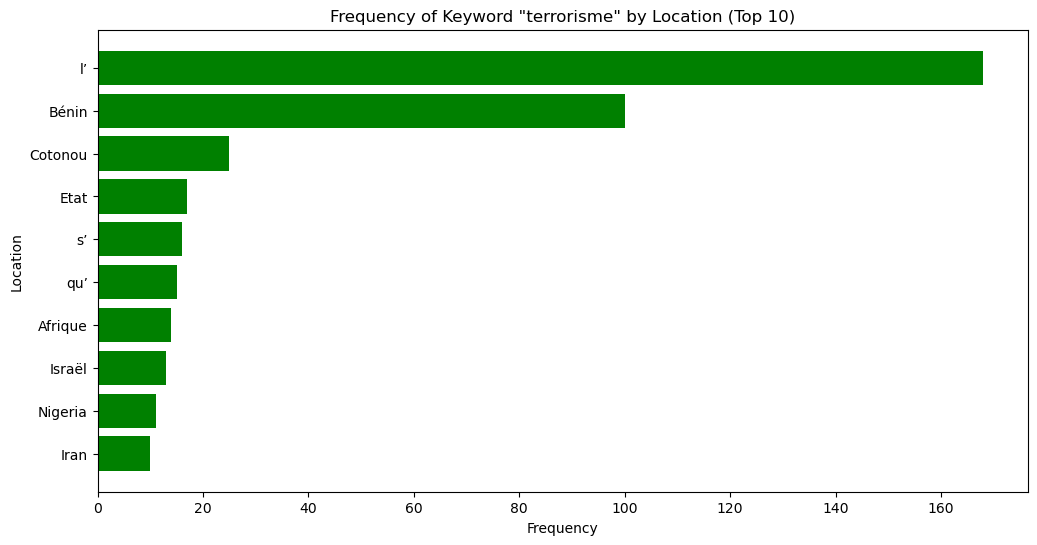

In [49]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it already has a 'Locations' column
# Also assuming you have a 'Contenu' column where the keyword is to be searched

# For a given keyword, for example, 'religion'
keyword = 'terrorisme'

# Filter articles containing the keyword and then explode by location
keyword_df = df[df['Contenu'].str.contains(keyword, case=False)].explode('Locations')

# Count frequency by location
keyword_frequency_by_location = keyword_df['Locations'].value_counts().reset_index()
keyword_frequency_by_location.columns = ['Location', 'Frequency']

# Show only the top 10 locations
top_n = 10
top_n_keyword_frequency_by_location = keyword_frequency_by_location.nlargest(top_n, 'Frequency')

# Visualize the data
plt.figure(figsize=(12, 6))
plt.barh(top_n_keyword_frequency_by_location['Location'], top_n_keyword_frequency_by_location['Frequency'], color='green')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title(f'Frequency of Keyword "{keyword}" by Location (Top {top_n})')
plt.gca().invert_yaxis()
plt.show()


Run this code after you have successfully added the 'Locations' column to your DataFrame through geotagging. This will produce a bar chart showing the frequency of your selected keyword ('religion' in this example) in the top 10 most frequently mentioned locations.

Feel free to adjust the keyword and top_n variables to suit your specific research needs.

If you have a 'Location' column where each entry consists of country, region, or city names separated by ' | ', you can adapt the code for frequency analysis as follows:

First, you would need to split the 'Location' strings into lists, similar to how you would handle multiple keywords. Then you can proceed to filter articles by keyword and count the frequency of each geographical location.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and you've added the 'Location' column
# Split the 'Location' strings into lists
df['Location_List'] = df['Location'].str.split(' | ')

# For a given keyword, for example, 'religion'
keyword = 'religion'

# Filter articles containing the keyword
keyword_df = df[df['Contenu'].str.contains(keyword, case=False)]

# Explode the DataFrame by the 'Location_List' column
exploded_df = keyword_df.explode('Location_List')

# Count frequency by location
location_frequency = exploded_df['Location_List'].value_counts().reset_index()
location_frequency.columns = ['Location', 'Frequency']

# Take only the top 10 locations by frequency
top_n = 10
top_n_locations = location_frequency.nlargest(top_n, 'Frequency')

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_n_locations['Location'], top_n_locations['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title(f'Top {top_n} Locations for Keyword "{keyword}"')
plt.gca().invert_yaxis()
plt.show()


This code will generate a bar chart that displays the top 10 locations where your chosen keyword appears most frequently.

Please adjust the keyword and top_n variables to fit your specific needs.

# Comparative Analysis
Extend the analysis to compare your corpus with another dataset, perhaps articles from a different time period, location, or subject matter.
Comparative analysis between two corpora from different countries can offer valuable insights into regional variations in topics, sentiment, and framing. Here are some analytical angles you could consider:

Analytical Approaches:
Topic Frequency: Compare the frequency of specific keywords or topics in both corpora.
Sentiment Analysis: Examine how sentiment towards certain topics varies between the two corpora.
Geospatial Analysis: If both corpora have location data, compare how topics are geographically distributed in each country.
Temporal Trends: Explore how the frequency or sentiment of certain topics has changed over time in both countries.

In [ ]:
# For a given keyword, for example, 'religion'
keyword = 'religion'

# Count occurrences in both corpora
count_corpus1 = df1[df1['Contenu'].str.contains(keyword, case=False)].shape[0]
count_corpus2 = df2[df2['Contenu'].str.contains(keyword, case=False)].shape[0]

# Visualize
plt.bar(['Benin', 'Burkina Faso'], [count_corpus1, count_corpus2], color=['blue', 'green'])
plt.title(f'Frequency of Keyword "{keyword}"')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()
